In [37]:
from concurrent.futures import ThreadPoolExecutor
import sqlite3
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
from shapely.geometry import LineString


In [5]:
def read_fleet_from_db(query):
    dat = {}
    conn = sqlite3.connect(fleet_dbFile)
    c = conn.cursor()
    c.execute(query)
    rows = c.fetchall()   
    print("Length of rows: ", len(rows)) 
    for row in rows:
        ID = row[0]
        response = row[1]
        input = row[2]
        output_90 = row[3]
        output_100 = row[4]
        output_dist = row[5]

        inIDS = pickle.loads(input)
        odist = pickle.loads(output_dist)
        inXML = pickle.loads(input)

        tmpDat = [ID, response, inIDS, output_90, output_100, odist]

        d = tmpDat
        scen = {}
            
        #try:
        #    root = d[2].getroot()
        #except:
        #    print('error')
        #    root = []
        #    continue
        scenID = d[0]
        #print(root.tag)
        #for child in root:    
        #    ### find the segment ID
        #    segmentID = child.find('ID').text
        #    speed = float(child.find('Freeflow_Speed').text)
        #    lanes = float(child.find('Number_of_Lanes').text)
        #    blocked = False
        #    if segmentID in link_ids:
        #        scen[segmentID] = speed
        saveDat = [inIDS, d[3]]  
        dat[ID] = saveDat#.append([ID, response, inXML, output_90, output_100, odist])

    conn.close()
    return dat

def read_ladris_from_db(query):
    dat = {}
    conn = sqlite3.connect(ladris_dbFile)
    c = conn.cursor()
    c.execute(query)
    rows = c.fetchall()    
    for row in rows:
        ID = row[0]
        response = row[1]
        input = row[2]
        output_90 = row[3]
        output_100 = row[4]
        output_dist = row[5]

        inIDS = pickle.loads(input)
        odist = pickle.loads(output_dist)
        inXML = pickle.loads(input)

        tmpDat = [ID, response, inXML, output_90, output_100, odist]

        d = tmpDat
        scen = {}

        scenID = d[0]
        #print(root.tag)
        #for child in d[2]:    
        #    ### find the segment ID
        #    segmentID = child['osmid']
        #    speed = float(child['speed_mph'])
        #    lanes = float(child['num_lanes'])
        #    blocked = child['is_blocked']
        #    if blocked == True:
        #        scen[segmentID] = 1
        #    #if segmentID in link_ids:
        #        #scen[segmentID] = blocked
        saveDat = [inIDS, d[3]]  
        dat[ID] = saveDat#.append([ID, response, inXML, output_90, output_100, odist])

    conn.close()
    return dat

In [6]:
ladris_dbFile = '/home/pfoytik/rtepm/EMA/lhc_samples/guid_blocked_ladris_scenarios.db'
fleet_dbFile = '/home/pfoytik/rtepm/EMA/lhc_samples/fleet_roadBlocked_scenarios.db'

In [7]:
queries = [
    'SELECT * FROM scenarios ORDER BY id DESC limit 2000',
    'SELECT * FROM scenarios ORDER BY id DESC limit 2000 offset 2000',
    'SELECT * FROM scenarios ORDER BY id DESC limit 2000 offset 4000',
    'SELECT * FROM scenarios ORDER BY id DESC limit 2000 offset 6000',
    'SELECT * FROM scenarios ORDER BY id DESC limit 1000 offset 8000',    
]

ladris_comb_scenarios = {}
with ThreadPoolExecutor(max_workers=6) as executor:
    for result in executor.map(read_ladris_from_db, queries):
        ladris_comb_scenarios.update(result)

print(len(ladris_comb_scenarios))

fleet_comb_scenarios = {}
with ThreadPoolExecutor(max_workers=6) as executor:
    for result in executor.map(read_fleet_from_db, queries):
        fleet_comb_scenarios.update(result)

print(len(fleet_comb_scenarios))        


8998
Length of rows:  2000
Length of rows:  2000
Length of rows:  2000
Length of rows:  0
Length of rows:  34
6034


In [9]:
ladris_comb_scenarios.keys()

dict_keys([2253500, 2253000, 2252501, 2252003, 2251506, 2251010, 2250515, 2250021, 2249528, 2249036, 2248545, 2248055, 2247566, 2247078, 2246591, 2246105, 2245620, 2245136, 2244653, 2244171, 2243690, 2243210, 2242731, 2242253, 2241776, 2241300, 2240825, 2240351, 2239878, 2239406, 2238935, 2238465, 2237996, 2237528, 2237061, 2236595, 2236130, 2235666, 2235203, 2234741, 2234280, 2233820, 2233361, 2232903, 2232446, 2231990, 2231535, 2231081, 2230628, 2230176, 2229725, 2229275, 2228826, 2228378, 2227931, 2227485, 2227040, 2226596, 2226153, 2225711, 2225270, 2224830, 2224391, 2223953, 2223516, 2223080, 2222645, 2222211, 2221778, 2221346, 2220915, 2220485, 2220056, 2219628, 2219201, 2218775, 2218350, 2217926, 2217503, 2217081, 2216660, 2216240, 2215821, 2215403, 2214986, 2214570, 2214155, 2213741, 2213328, 2212916, 2212505, 2212095, 2211686, 2211278, 2210871, 2210465, 2210060, 2209656, 2209253, 2208851, 2208450, 2208050, 2207651, 2207253, 2206856, 2206460, 2206065, 2205671, 2205278, 2204886,

In [10]:
fleet_comb_scenarios.keys()

dict_keys([1406675, 1406318, 1405962, 1405607, 1405253, 1404900, 1404548, 1404197, 1403847, 1403498, 1403150, 1402803, 1402457, 1402112, 1401768, 1401425, 1401083, 1400742, 1400402, 1400063, 1399725, 1399388, 1399052, 1398717, 1398383, 1398050, 1397718, 1397387, 1397057, 1396728, 1396400, 1396073, 1395747, 1395422, 1395098, 1394775, 1394453, 1394132, 1393812, 1393493, 1393175, 1392858, 1392542, 1392227, 1391913, 1391600, 1391288, 1390977, 1390667, 1390358, 1390050, 1389743, 1389437, 1389132, 1388828, 1388525, 1388223, 1387922, 1387622, 1387323, 1387025, 1386728, 1386432, 1386137, 1385843, 1385550, 1385258, 1384967, 1384677, 1384388, 1384100, 1383813, 1383527, 1383242, 1382958, 1382675, 1382393, 1382112, 1381832, 1381553, 1381275, 1380998, 1380722, 1380447, 1380173, 1379900, 1379628, 1379357, 1379087, 1378818, 1378550, 1378283, 1378017, 1377752, 1377488, 1377225, 1376963, 1376702, 1376442, 1376183, 1375925, 1375668, 1375412, 1375157, 1374903, 1374650, 1374398, 1374147, 1373897, 1373648,

In [11]:
ladris_df_results = pd.DataFrame([x[1] for x in ladris_comb_scenarios.values()])
fleet_df_results = pd.DataFrame([x[1] for x in fleet_comb_scenarios.values()])

ladris_dataDict = {}
fleet_dataDict = {}
for k in ladris_comb_scenarios.keys():
    for link in ladris_comb_scenarios[k][0]:        
        if link in ladris_dataDict.keys():
            pass
        else:
            #if link in link_ids:
            ladris_dataDict[link] = []   

for k in ladris_comb_scenarios.keys():
    for i in ladris_dataDict.keys():
        if i in ladris_comb_scenarios[k][0]:
            #if link in link_ids:
            ladris_dataDict[i].append(1)
        else:
            #if link in link_ids:
            ladris_dataDict[i].append(0) 

ladris_df = pd.DataFrame(ladris_dataDict)

for k in fleet_comb_scenarios.keys():
    for link in fleet_comb_scenarios[k][0]:        
        if link in fleet_dataDict.keys():
            pass
        else:
            #if link in link_ids:
            fleet_dataDict[link] = []   

for k in fleet_comb_scenarios.keys():
    for i in fleet_dataDict.keys():
        if i in fleet_comb_scenarios[k][0]:
            #if link in link_ids:
            fleet_dataDict[i].append(1)
        else:
            #if link in link_ids:
            fleet_dataDict[i].append(0) 

fleet_df = pd.DataFrame(fleet_dataDict)

# Process and compare inputs

In [25]:
print("Fleet segments:", len(fleet_df.columns))
print("Ladris segments:", len(ladris_df.columns))


Fleet segments: 579
Ladris segments: 2295


In [100]:
fleet_ids = list(fleet_df.columns)
ladris_ids = list(ladris_df.columns)

### Get Ladris Roads


In [146]:
ladris_segment_data = {}
roadFile = '../lhc_samples/data/ladris/C27F9DE4CE6780696685FB4A4E31E242_orig'
with open(roadFile, 'r') as f:
    ladris_segment_data = json.load(f)

ladris_latlong_dict = {}
ladris_potential_dict = {}
modified_dict = {}
ladris_names = {}

for i in ladris_segment_data:
    #print(i)
    ladris_latlong_dict[i['AC91D0B60F78BEFB85DE39CD9C3D2623']] = i['geometry']
    lanes = i['num_lanes']
    speed = i['speed_mph']
    ladris_names[i['AC91D0B60F78BEFB85DE39CD9C3D2623']] = i['name']
    ladris_potential_dict[i['AC91D0B60F78BEFB85DE39CD9C3D2623']] = lanes * speed

In [129]:
### count how many ladris_ids are in ladris_latlong_dict.keys
ladris_count = 0
for i in ladris_ids:
    if i in ladris_latlong_dict.keys():
        ladris_count += 1
    else:
        pass

print("Ladris segments in ladris_latlong_dict:", ladris_count)



Ladris segments in ladris_latlong_dict: 2295


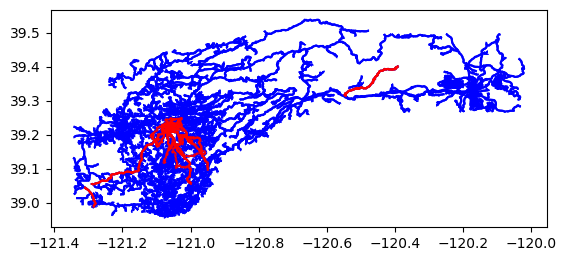

In [130]:
#### ladris_latlong_dict
new_ladris_latlong_dict = {}
for i in ladris_latlong_dict:    
    if i in ladris_ids:                
        #print(LineString(ladris_latlong_dict[i]))        
        new_ladris_latlong_dict[i] = LineString(ladris_latlong_dict[i])            
    ladris_latlong_dict[i] = LineString(ladris_latlong_dict[i])



all_gdf = GeoDataFrame(geometry=[ladris_latlong_dict[i] for i in ladris_latlong_dict])
sub_gdf = GeoDataFrame(geometry=[new_ladris_latlong_dict[i] for i in new_ladris_latlong_dict])


### plot all_gdf and sub_gdf on same plot
fig, ax = plt.subplots()
all_gdf.plot(ax=ax, color='blue')
sub_gdf.plot(ax=ax, color='red')

plt.show()

### Get Fleet Roads

In [141]:
### read segment id's from ../lhc_samples/data/fleet/segments.xml
tree = ET.parse('../lhc_samples/data/fleet/segments.xml')
root = tree.getroot()

fleet_segment_dict = {}
fleet_potential_dict = {}
for child in root:
    fleet_segment_dict[child.find('ID').text] = child.find('Link_ID').text
    lanes = int(child.find('Number_of_Lanes').text)
    speed = int(child.find('Freeflow_Speed').text)
    fleet_potential_dict[child.find('ID').text] = lanes * speed

### read ../lhcsamples/data/fleet/links.xml
tree = ET.parse('../lhc_samples/data/fleet/links.xml')
root = tree.getroot()

fleet_link_dict = {}
fleet_name_dict = {}
for child in root:
    fleet_link_dict[child.find('ID').text] = [child.find('ANode').text, child.find('BNode').text]    
    fleet_name_dict[child.find('ID').text] = child.find('Name').text

### read ../lhcsamples/data/fleet/nodes.xml and get lat long for BNode of each fleet_link_dict
tree = ET.parse('../lhc_samples/data/fleet/nodes.xml')
root = tree.getroot()

fleet_node_dict = {}
for child in root:
    fleet_node_dict[child.find('ID').text] = [child.find('Latitude').text, child.find('Longitude').text]

fleet_lat_long_dict = {}
### for each segment in fleet_segment_dict, get the link_id, from fleet_link_dict get the BNode, from fleet_node_dict get the lat long
for segment in fleet_segment_dict:
    link_id = fleet_segment_dict[segment]
    anode = fleet_link_dict[link_id][0]
    bnode = fleet_link_dict[link_id][1]
    lat_long = [fleet_node_dict[anode], fleet_node_dict[bnode]]
    fleet_lat_long_dict[int(segment)] = [[float(lat_long[0][1]), float(lat_long[0][0])],[float(lat_long[1][1]), float(lat_long[1][0])]]

In [138]:
### find value in fleet_lat_long_dict that is less than 39.05
bad_segments = []
for i in fleet_lat_long_dict:
    if fleet_lat_long_dict[i][0][1] < 39.1 or fleet_lat_long_dict[i][1][1] < 39.1:        
        print(i, fleet_lat_long_dict[i])
        ### remove from dictionary
        bad_segments.append(i)

for i in bad_segments:
    ### remove from fleet_lat_long_dict
    fleet_lat_long_dict.pop(i)

91170214 [[-121.06024, 39.0], [-121.05987, 39.2001]]
10091170214 [[-121.05987, 39.2001], [-121.06024, 39.0]]
116951100 [[-121.05605, 39.195], [-121.06024, 39.0]]
10116951100 [[-121.06024, 39.0], [-121.05605, 39.195]]
985378445 [[-121.06252, 39.1995], [-121.06024, 39.0]]
10985378445 [[-121.06024, 39.0], [-121.06252, 39.1995]]
985378446 [[-121.06024, 39.0], [-121.06085, 39.2007]]
10985378446 [[-121.06085, 39.2007], [-121.06024, 39.0]]


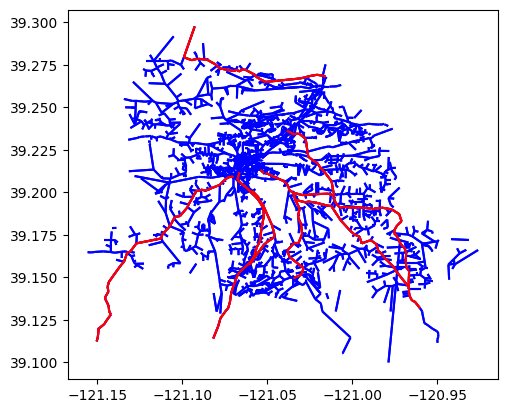

In [140]:
### for each fleet_lat_long_dict convert to float
new_fleet_lat_long_dict = {}
for i in fleet_lat_long_dict:
    if str(i) in fleet_ids:
        new_fleet_lat_long_dict[i] = LineString(fleet_lat_long_dict[i])
    fleet_lat_long_dict[i] = LineString(fleet_lat_long_dict[i])

all_gdf = GeoDataFrame(geometry=[fleet_lat_long_dict[i] for i in fleet_lat_long_dict])
sub_gdf = GeoDataFrame(geometry=[new_fleet_lat_long_dict[i] for i in new_fleet_lat_long_dict])

### plot all_gdf and sub_gdf on same plot
fig, ax = plt.subplots()
all_gdf.plot(ax=ax, color='blue')
sub_gdf.plot(ax=ax, color='red')

plt.show()

In [157]:
### print the first row of fleet_df
print(fleet_df.iloc[0].values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [160]:
print(fleet_df.iloc[1].values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

# Process and compare results

In [13]:
### fleet_df_results is in seconds and we need to convert it to hours
fleet_df_results = fleet_df_results/3600
fleet_df_results


,0
0,4.583333
1,6.500000
2,3.666667
3,4.583333
4,6.500000
...,...
6029,6.500000
6030,6.500000
6031,3.583333
6032,6.500000


In [16]:
### remove rows of ladris_df_results that have a value of 0
ladris_df_results = ladris_df_results[ladris_df_results != 0]
ladris_df_results = ladris_df_results.dropna()
ladris_df_results

,0
0,4.183883
1,4.321939
2,4.791880
3,4.189669
4,4.973522
...,...
8992,4.023497
8993,3.600986
8994,3.848572
8995,3.790810


In [17]:
### print summary statistics for fleet_df_results
fleet_df_results.describe()


,0
count,6032.000000
mean,5.259988
std,1.364742
min,2.666667
25%,3.666667
50%,6.500000
75%,6.500000
max,8.333333


In [18]:
### print summary statistics of ladris_df_results
ladris_df_results.describe()

,0
count,8064.000000
mean,4.586354
std,1.096884
min,0.214840
25%,4.164126
50%,4.480534
75%,5.085996
max,10.857103


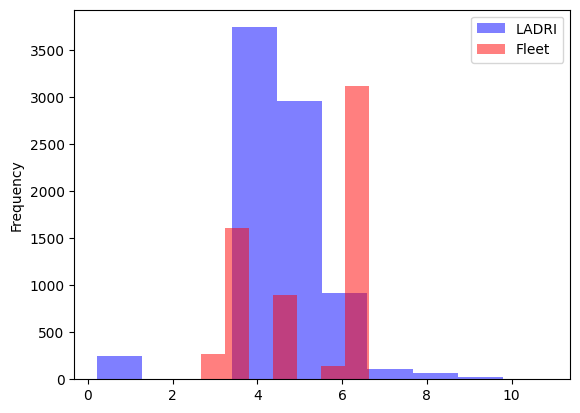

In [23]:
### plot histogram of fleet results and ladris results in the same figure
fig, ax = plt.subplots()
ladris_df_results.plot.hist(ax=ax, bins=10, alpha=0.5, color='blue')
fleet_df_results.plot.hist(ax=ax, bins=10, alpha=0.5, color='red')
### add a legend where the labels are 'LADRI' and 'Fleet'
plt.legend(['LADRI', 'Fleet'])

plt.show()